# Feature Extraction

### Reading data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the data
data_dir = os.getcwd() + '\\data\\'

# reading dataset
df = pd.read_csv(data_dir + '1.csv')
df.head()

,time,motion,distance,co2,label,timestamp
0,11:26:40,1,80.14,422,1,1.495121e+09
1,11:26:41,1,72.97,406,1,1.495121e+09
2,11:26:42,1,-1.00,406,1,1.495121e+09
3,11:26:43,1,-1.00,406,1,1.495121e+09
4,11:26:44,1,74.98,406,1,1.495121e+09


In [2]:
# Removing unnecessary columns
#df = df.drop(['time'], 1)

### Extracting Rolling (Moving) Average and Rolling RMS

We will calculate rolling average and rolling RMS in 1 to 180 windoe timeframe.

In [3]:
def rolling_sum(data, window_size = 4):
    ret = np.cumsum(data, dtype = float)
    ret[window_size:] = ret[window_size:] - ret[:-window_size]
    return ret

def rolling_avg(data, window_size = 4):
    return rolling_sum(data, window_size) / window_size

def rolling_sum_sqr(data, window_size = 4):
    x = np.square(data)
    return rolling_sum(x, window_size)

def rolling_rms(data, window_size = 4):
    sqr = rolling_sum_sqr(data, window_size) / window_size
    avg = np.square(rolling_avg(data, window_size))
    vals = np.absolute(sqr - avg)
    return np.sqrt(vals)

In [4]:
column_names = ['motion', 'distance', 'co2']

for col_name in column_names:
    for i in range(2,181):
        avg_col_name = col_name + '_avg_' + str(i)
        df[avg_col_name]= rolling_avg(df[col_name].tolist(), i)
        rms_col_name = col_name + '_rms_' + str(i)
        df[rms_col_name]= rolling_rms(df[col_name].tolist(), i)

In [5]:
def plot_chart(data, column_name, label, view_range = None):
 
    cols = ['timestamp', column_name, 'label']
    
    d = data[cols]
    d = d.set_index(['timestamp'])
    
    plt.figure(figsize = (15,4))
    
    if view_range is None:
        p1 = d[column_name].plot()
        p2 = d['label'].plot(secondary_y = True)
    else:
        p1 = d[column_name][view_range].plot()
        p2 = d['label'][view_range].plot(secondary_y = True)
        
    p1.set_ylabel(label)
    #p1.set_xticks([])

    plt.gcf().autofmt_xdate()
    
    p2.margins(0, 0.1)
    p1.set_xlabel('Timestamp')
    plt.show() 

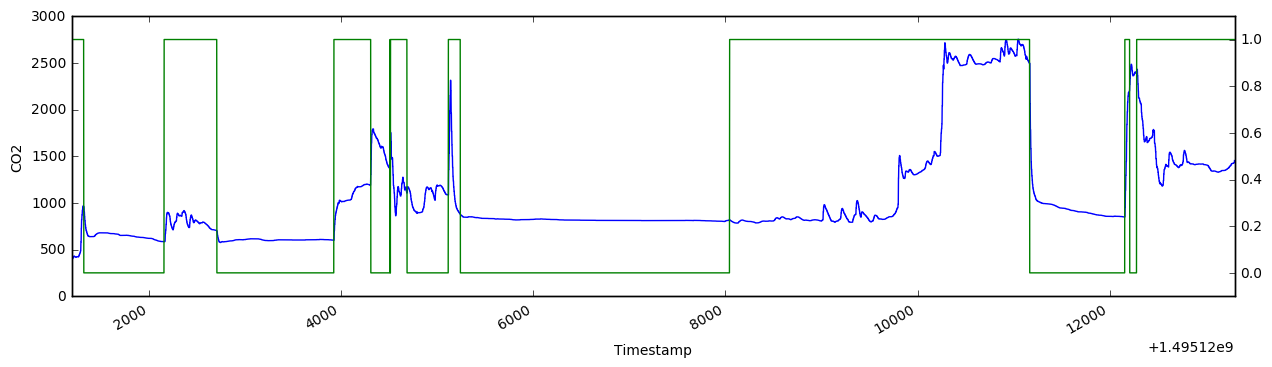

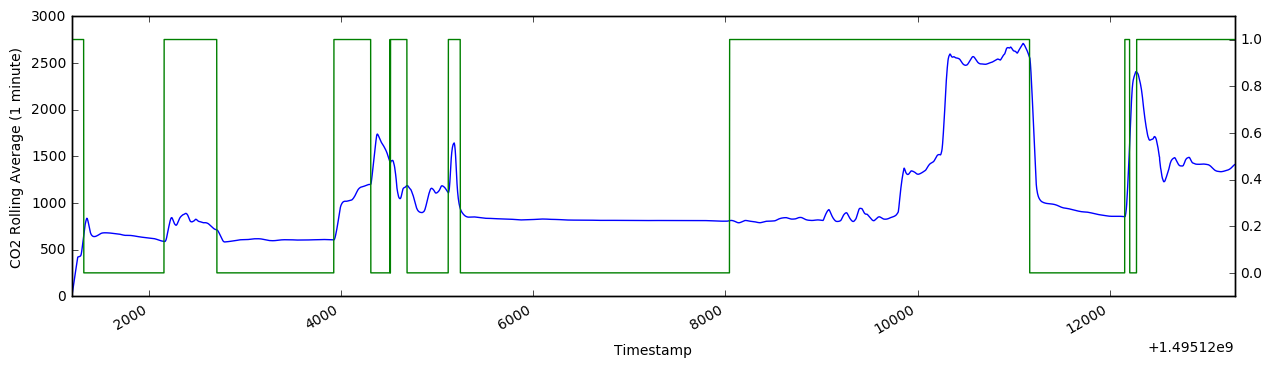

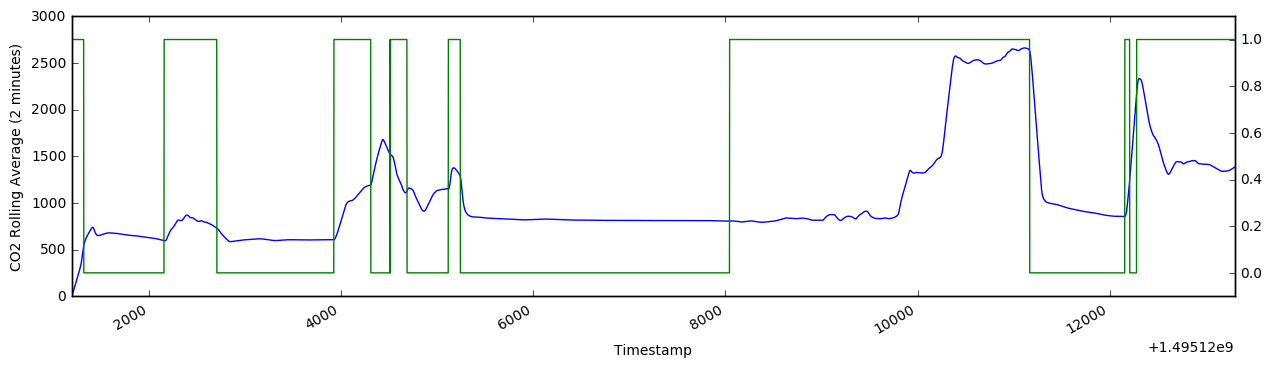

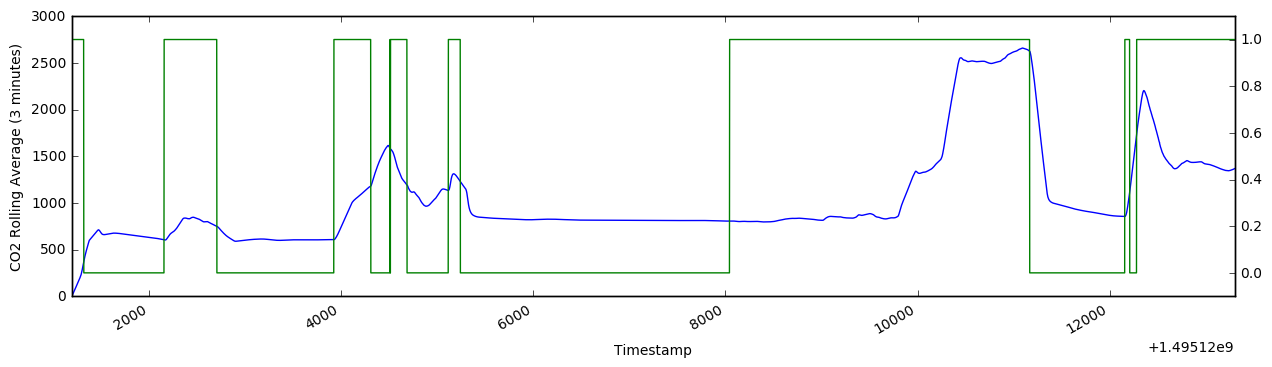

In [9]:
plot_chart(df, 'co2', 'CO2')
plot_chart(df, 'co2_avg_60', 'CO2 Rolling Average (1 minute)')
plot_chart(df, 'co2_avg_120', 'CO2 Rolling Average (2 minutes)')
plot_chart(df, 'co2_avg_180', 'CO2 Rolling Average (3 minutes)')

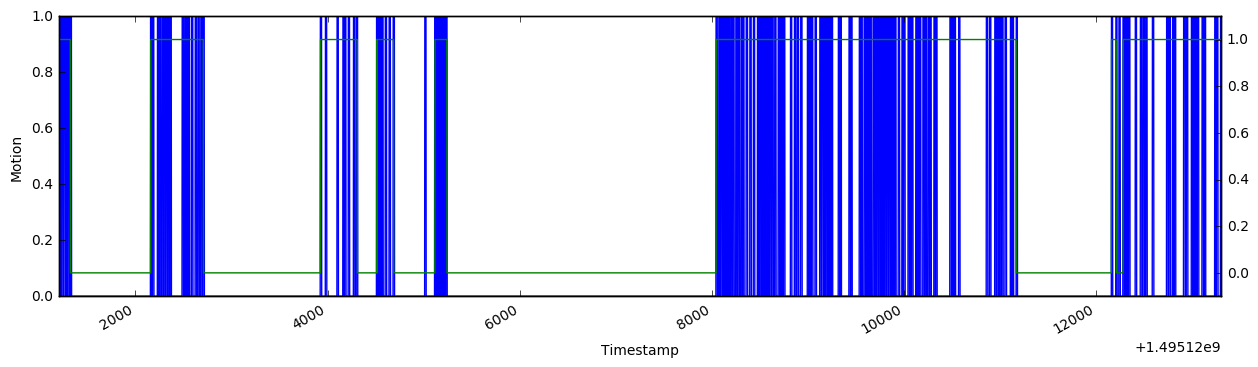

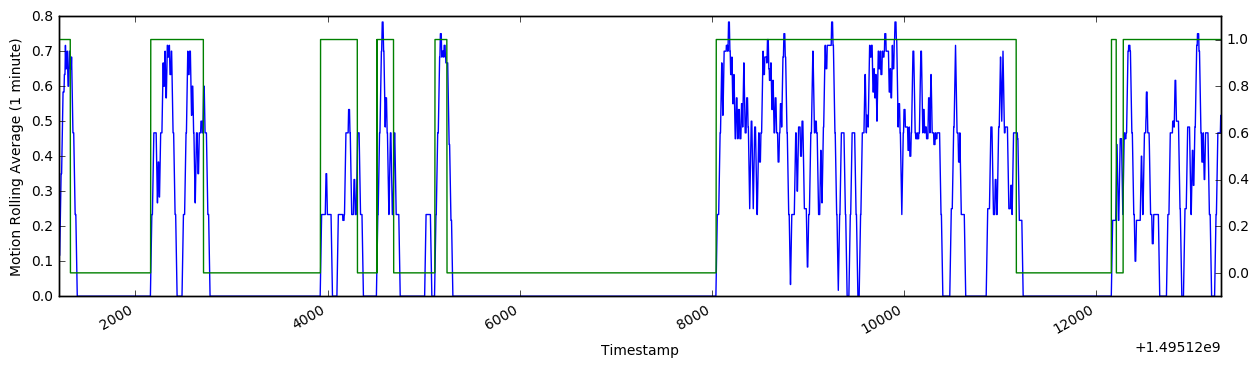

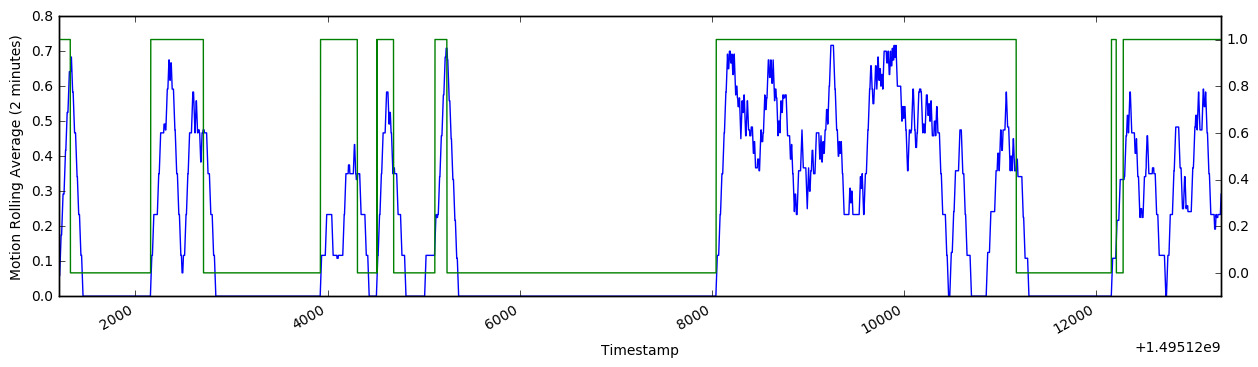

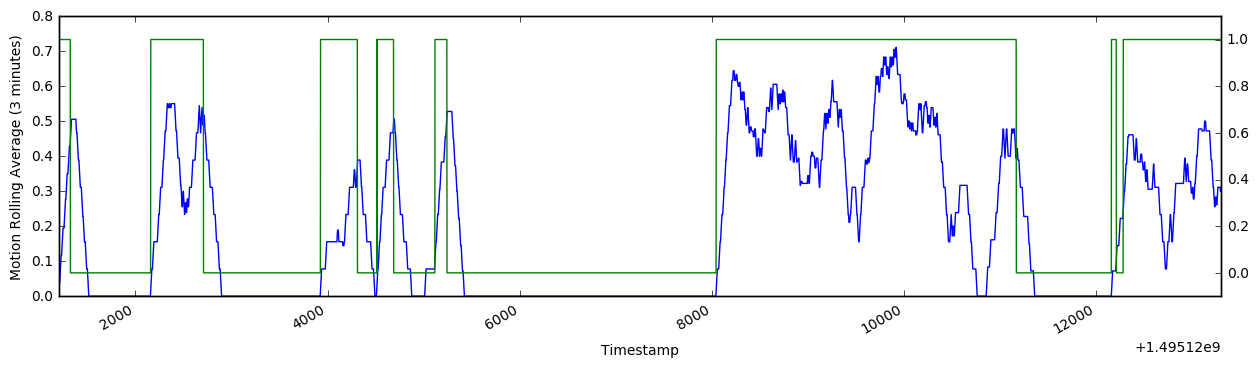

In [7]:
plot_chart(df, 'motion', 'Motion')
plot_chart(df, 'motion_avg_60', 'Motion Rolling Average (1 minute)')
plot_chart(df, 'motion_avg_120', 'Motion Rolling Average (2 minutes)')
plot_chart(df, 'motion_avg_180', 'Motion Rolling Average (3 minutes)')

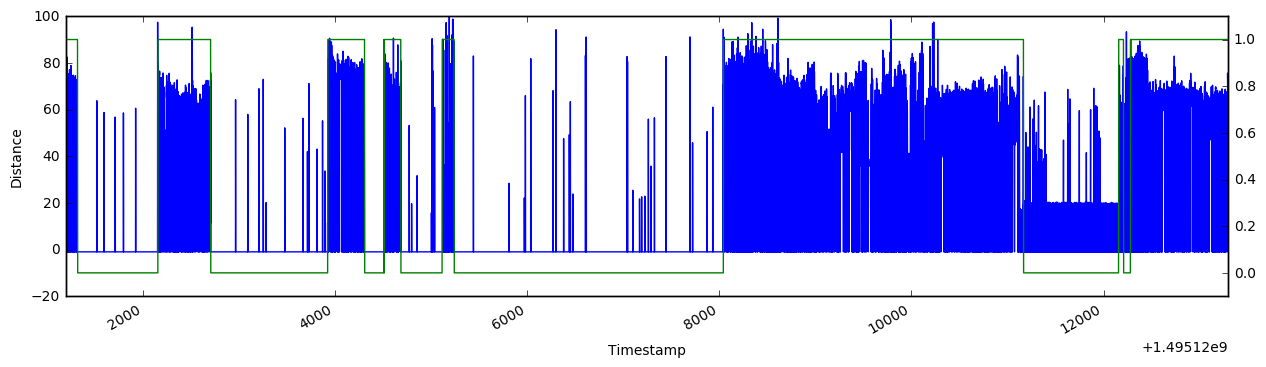

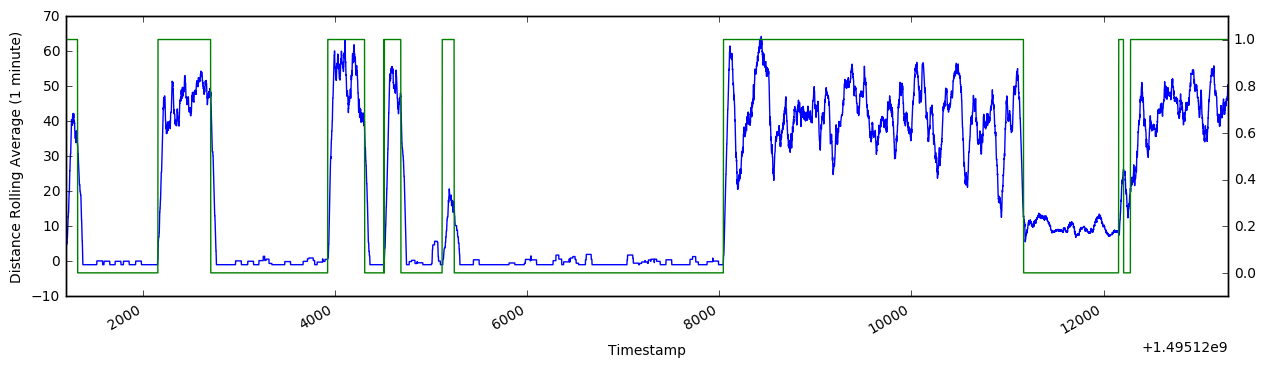

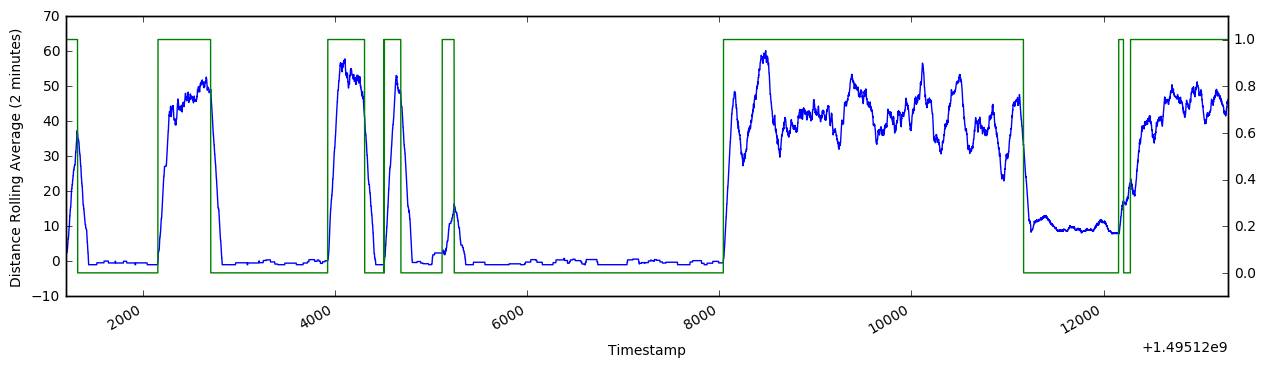

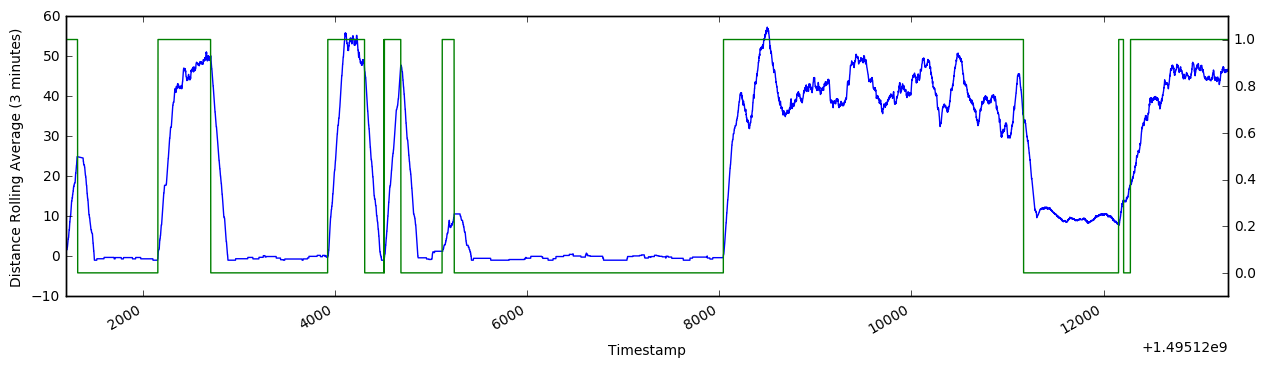

In [10]:
plot_chart(df, 'distance', 'Distance')
plot_chart(df, 'distance_avg_60', 'Distance Rolling Average (1 minute)')
plot_chart(df, 'distance_avg_120', 'Distance Rolling Average (2 minutes)')
plot_chart(df, 'distance_avg_180', 'Distance Rolling Average (3 minutes)')

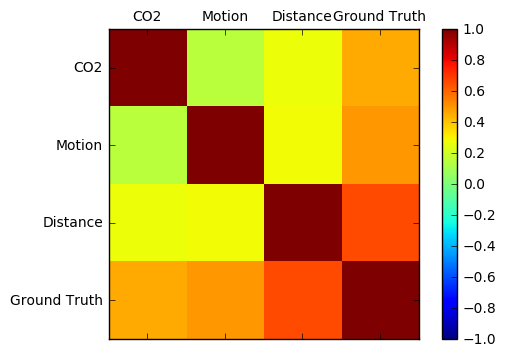

In [30]:
column_names = ['co2', 'motion', 'distance', 'label']

x = df[column_names]
column_names_vis = ['CO2', 'Motion', 'Distance', 'Ground Truth']

# Correction Matrix Plot
correlations = x.corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column_names_vis)
ax.set_yticklabels(column_names_vis)
plt.show()

In [12]:
df.to_csv(data_dir + '2.csv')